<img src="https://www.getnews.info/uploads/fd7ca5a6b7f967e6e6169ad4b0c8c100.png" alt="drawing" width="600" />

# <center> 'No-Show Appointment' Investigate Dataset Project
### <center> Onyebueke Nnaemeka | *onyebuekennaemeka@yahoo.com*
    
This project is part of the Udacity x ALT Nanogree in Data Analysis program. I have chosen this [No_Show Appointment dataset](https://www.kaggle.com/datasets/joniarroba/noshowappointments?resource=download) to study how a sample population of Brazilians show up for medical appointment. The list of [datasets](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub) options available for this project have been provided by the Udacity Team.
    
    
### **Some Important Insight I seek**
- Did the sample patients show up for scheduled appointment(s) most of the time or otherwise?
- What is the age distribution, gender, location of facility for when patients showed up and otherwise?
- What number of unique patients showed up?
- Are people more likely to show up for scheduled appointments when they have any welfare package in place?
- At what time of the year do the people make the most appointments?


### Import Packages and Load Dataset

We need `pandas`, `numpy` and `matplotlib` packages for this project. We call the `read.csv` function to load the dataset which i already downloaded to my local machine.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline    

In [2]:
#load the csv file and view first two rows
df = pd.read_csv("C:\\Users\\user\\Downloads\\KaggleV2-May-2016.csv")
print('\n')
print("This dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]) )
df.head(2)



This dataset has 110527 rows and 14 columns


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [3]:
#summary statistics of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning

There are no missing values in this dataset as seen below.

In [4]:
#explore data types and check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no duplicate entries; all the 110,057 rows represent unique appointments.

In [5]:
#check columns with duplicates
df.loc[df.duplicated(), :]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [6]:
#confirm there are no duplicate appointments
df['AppointmentID'].nunique()

110527

While there are no duplicate entries, let's explore the `PatientId` column for duplicate values - instances when a patient has more than one appointment. 

In [7]:
#Number of patients in the raw dataset
print('Number of entries:', df['PatientId'].count())

#check for duplicate values in PatientId
print('Patients with more than one appointment:', df['PatientId'].duplicated().sum())

#number of unique patients
print('Unique Patients:', df['PatientId'].nunique())

Number of entries: 110527
Patients with more than one appointment: 48228
Unique Patients: 62299


In [8]:
#convert patientId from float64 to int64
df['PatientId'] = df['PatientId'].astype('int64')

print(type(df['PatientId'][0]))
print(df['PatientId'].count())

<class 'numpy.int64'>
110527


Some *string* datatype columns are encoded as *Object* datatype, let us use the `convert_dtypes` function to change data  types..

In [9]:
#this function identifies the most appropriate datatype and converts
df = df.convert_dtypes()

Extract and store *date* variable from the *datetime* columns; we do not necesarily need the *time* varibles.

In [10]:
#extract date values from datetime columns and store in date format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'].str.split('T').str[0])

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'].str.split('T').str[0])

Here let us create the `wait_days` column; this column has the number of days interval between `ScheduleDay` and `AppointmentDay`. We want to know how long a patient had to wait for their appointment or they got it earlier than scheduled.

In [11]:
#evaluate if patient was available on schedule date

df['wait_days'] = ((df['AppointmentDay'] - df['ScheduledDay'])).dt.days

#min waiting days
print(df['wait_days'].min())

#max waiting days
print(df['wait_days'].max())

#mean waiting days
print(df['wait_days'].mean())


-6
179
10.183701719941734


We can see below that the earliest a patient got the appointment was **6 days** earlier than the actual scheduled date and the lattest being a whole **six months**. On the average, a patient waits for **10 days**.

In [12]:
#check out the patient that got the appointment most earlier
df.query('wait_days ==-6')

# We can see the patient is quite aged; there must have been an emergency

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,wait_days
71533,998231581612122,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6


Let's also extract the `AppoimtmentMonth` from the `AppointmentDay` column. We will leave it in `str` datatype for proper labelling when plotted.

In [13]:
#extract month and year from date from column
df['AppoimtmentMonth'] = df['AppointmentDay'].dt.strftime('%b-%Y')
df['AppoimtmentMonth'].value_counts()

May-2016    80841
Jun-2016    26451
Apr-2016     3235
Name: AppoimtmentMonth, dtype: int64

In [14]:
#verify the change in data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   PatientId         110527 non-null  Int64         
 1   AppointmentID     110527 non-null  Int64         
 2   Gender            110527 non-null  string        
 3   ScheduledDay      110527 non-null  datetime64[ns]
 4   AppointmentDay    110527 non-null  datetime64[ns]
 5   Age               110527 non-null  Int64         
 6   Neighbourhood     110527 non-null  string        
 7   Scholarship       110527 non-null  Int64         
 8   Hipertension      110527 non-null  Int64         
 9   Diabetes          110527 non-null  Int64         
 10  Alcoholism        110527 non-null  Int64         
 11  Handcap           110527 non-null  Int64         
 12  SMS_received      110527 non-null  Int64         
 13  No-show           110527 non-null  string        
 14  wait

In [15]:
#convert from uppercase to initial capital letter
df['Neighbourhood'] = df['Neighbourhood'].str.title()

To aid easy understanding, we will rename the `No-show` column to `Showed_Up` and accordingly remap Yes and No for patients who showed up for their appointment and vice versa.

In [16]:
#rename the column
df.rename(columns= {'No-show': 'Showed_Up'}, inplace=True)

#replace the values
df['Showed_Up'] = df['Showed_Up'].replace({'No':'Yes', 'Yes':'No'})

We can save the cleaned dataset as `csv` file.

In [17]:
#df.to_csv('C:\\Users\\user\\OneDrive\\Desktop\\person data projects\\datasets\\medical_appointments.csv')

### Exploratory Data Analysis

Let us view the distribution of a selection of the data attributes.

<ipython-input-18-e658b0b70863>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.drop(['PatientId','ScheduledDay','AppointmentDay','AppointmentID'],axis=1).hist(ax=ax)


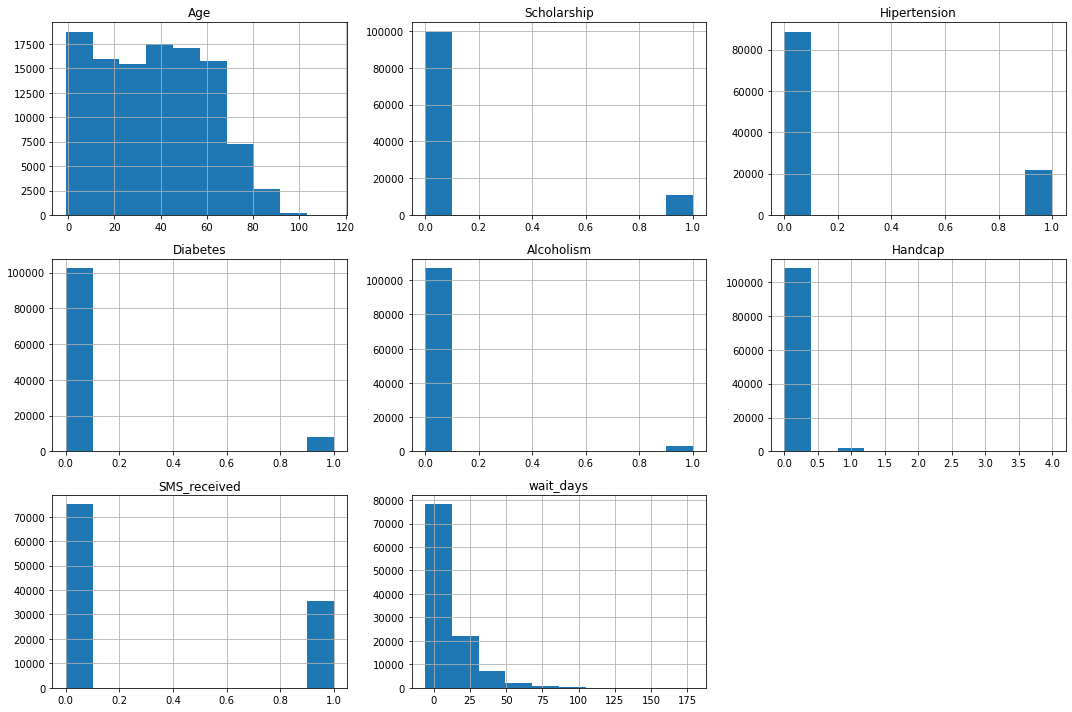

In [18]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()

df.drop(['PatientId','ScheduledDay','AppointmentDay','AppointmentID'],axis=1).hist(ax=ax)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

About **80%** of the patients showed up for thier appointment.

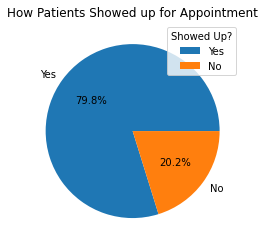

In [19]:
df.Showed_Up.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('How Patients Showed up for Appointment')
plt.ylabel('')
plt.legend(title='Showed Up?')
plt.show()

Below shows us the age bracket of patients who booked appointments. We can see the patients are mid-aged women and tenage boys. We can infer that most of these appointments are made by mothers for on behalf of themselves and the children.

These health facilities will mostly be into paediaterics and gynaecolgy.

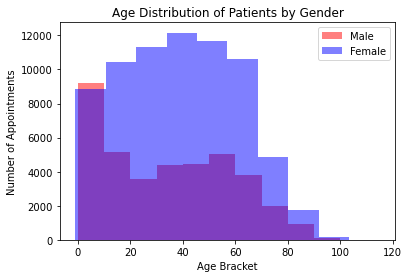

Average male age 33.73686251195492
Average female age 38.89398663697105


In [20]:
#age distribution of the patients by gender
male = df[df['Gender']=='M']
female = df[df['Gender']=='F']

def plot_hist(val1, val2, label1, label2):
    plt.hist(val1, color ='r', alpha = 0.5, label=label1)
    plt.hist(val2, color ='b', alpha = 0.5, label=label2)
    plt.xlabel('Age Bracket')
    plt.ylabel('Number of Appointments')
    plt.title('Age Distribution of Patients by Gender')
    plt.legend()
    #plt.figure(figsize=(15,5))
    plt.show()
    
plot_hist(male.Age, female.Age, 'Male','Female')   
plt.rcParams["figure.figsize"] = (12,7)

print('Average male age', male.Age.mean())
print('Average female age', female.Age.mean())

Below we visualized the age distribution of patients who showed up for appointment and vice versa as well as the number of days they had to wait before getting an appointment.

The patient population is predominantly female as we can see above that the female bars overlapped the male's in all plots below.

Most of the female patients who showed up are in the child-bearing and young-motherhood age bracket while non-adult males (children and adulescents) showed up more.

For patients who didnt show up, they're mostly ladies and young mothers; and boys and adulscent males.

For waiting period less than **40 days**, the patients showed up unlike when they had to wait for as much as a **100 days**.

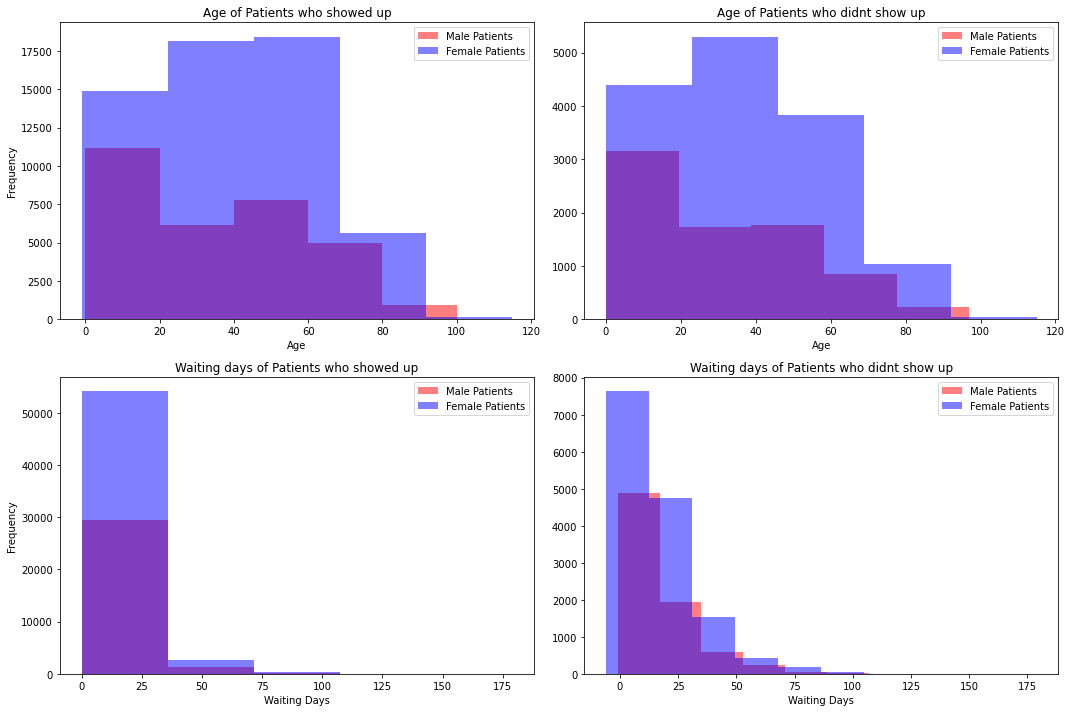

In [21]:
#male patients who did and who didnt show up
male_y = df.query(' Gender == "M" & Showed_Up =="Yes"')
male_n = df.query(' Gender == "M" & Showed_Up !="Yes"')

#female patients who did and who didnt show up
female_y = df.query(' Gender == "F" & Showed_Up =="Yes"')
female_n = df.query(' Gender == "F" & Showed_Up !="Yes"')


#fig, ((ax0, ax1), (ax2, ax3) = plt.subplots(2,2 ,figsize=(15,10))
fig, ((ax0, ax1), (ax2, ax3 )) = plt.subplots(2,2 ,figsize=(15,10))
      
ax0.hist(male_y.Age, 5, color ='r', alpha = 0.5, label='Male Patients')
ax0.hist(female_y.Age, 5, color ='b', alpha = 0.5, label='Female Patients')
ax0.legend(prop={'size': 10})
ax0.set_xlabel('Age')
ax0.set_ylabel('Frequency')
ax0.set_title('Age of Patients who showed up')

ax1.hist(male_n.Age, 5, color ='r', alpha = 0.5, label='Male Patients')
ax1.hist(female_n.Age, 5, color ='b', alpha = 0.5, label='Female Patients')
ax1.legend(prop={'size': 10})
ax1.set_xlabel('Age')
ax1.set_title('Age of Patients who didnt show up')

ax2.hist(male_y.wait_days, 5, color ='r', alpha = 0.5, label='Male Patients')
ax2.hist(female_y.wait_days,5, color ='b', alpha = 0.5, label='Female Patients')
ax2.legend(prop={'size': 10})
ax2.set_xlabel('Waiting Days')
ax2.set_ylabel('Frequency')
ax2.set_title('Waiting days of Patients who showed up')

ax3.hist(male_n.wait_days, 10, color ='r', alpha = 0.5, label='Male Patients')
ax3.hist(female_n.wait_days,10, color ='b', alpha = 0.5, label='Female Patients')
ax3.legend(prop={'size': 10})
ax3.set_xlabel('Waiting Days')
ax3.set_title('Waiting days of Patients who didnt show up')

fig.tight_layout()
plt.show()

Below, we want to find out the hospital locations that had the most patients showing up.
We can see that *Jabout, Maria Ortiz, Resistencia Belo etc* had the most patients showing up while *Itarere, Caratotira, Sao Pedro, Consolacao* are locations where patients didnt show up.

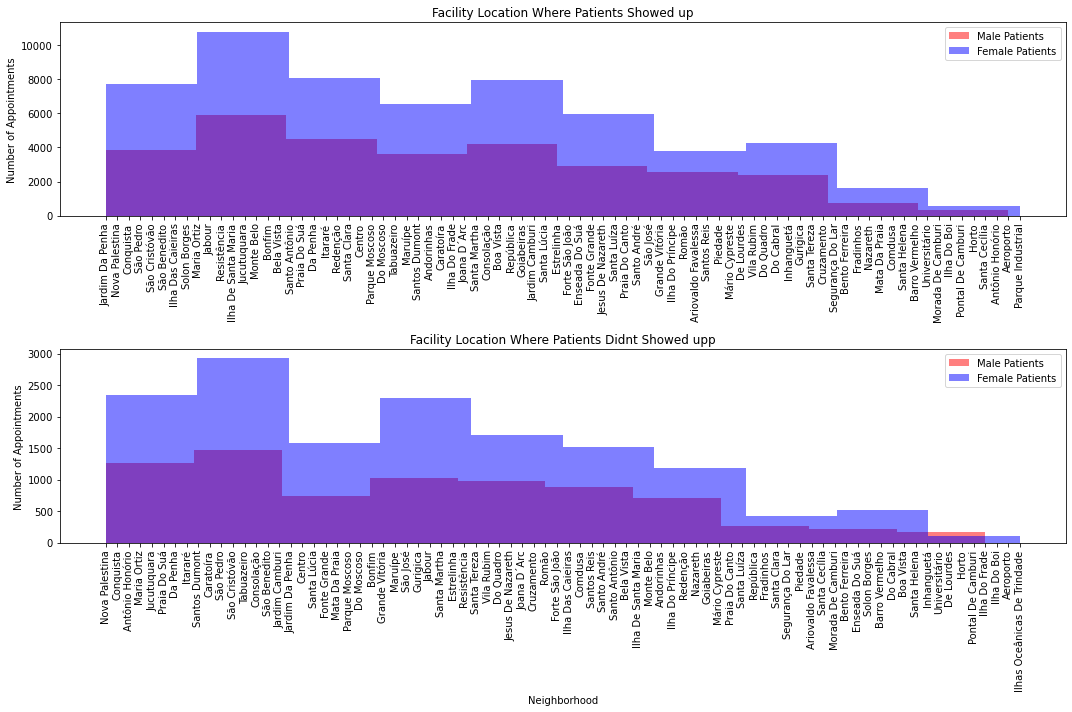

In [22]:

fig, ((ax4), (ax5 )) = plt.subplots(2,1 ,figsize=(15,10))

ax4.hist(male_y.Neighbourhood, color ='r', alpha = 0.5, label='Male Patients')
ax4.hist(female_y.Neighbourhood, color ='b', alpha = 0.5, label='Female Patients')
ax4.legend(prop={'size': 10})
#ax4.set_xlabel('Neighborhood')
ax4.set_ylabel('Number of Appointments')
ax4.xaxis.set_tick_params(rotation=90)
ax4.set_title('Facility Location Where Patients Showed up')

ax5.hist(male_n.Neighbourhood, color ='r', alpha = 0.5, label='Male Patients')
ax5.hist(female_n.Neighbourhood, color ='b', alpha = 0.5, label='Female Patients')
ax5.legend(prop={'size': 10})
ax5.set_xlabel('Neighborhood')
ax5.set_ylabel('Number of Appointments')
ax5.xaxis.set_tick_params(rotation=90)
ax5.set_title('Facility Location Where Patients Didnt Showed upp')

fig.tight_layout() #auto maintains space between subplots
plt.show()

A number of patients had more than one appointment within the period. Below we can see how patients who showed up made repeat appointments. 

Out of *62299* patients, *54154* showed up; *18444* patients showed up for more than one appointment while *892* had more than five appointments.

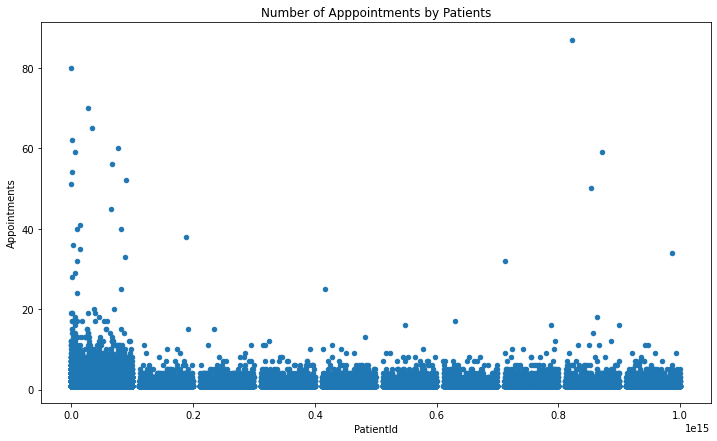

Unique patients who showed up: 54154


In [23]:
#create dataframe of patients who showed up
df_y = df.query('Showed_Up == "Yes"')

#value count of patients who showed up and store in a dataframe
v = df_y.PatientId.value_counts()
df_rp = df_y[df_y.PatientId.isin(v.index[v.gt(0)])] #

#create dataframe of patients and number of their appointments
df_rp = df_rp.PatientId.value_counts().rename_axis('PatientId').reset_index(name='Appointments')

#scatter plot of patients and number of appointments
df_rp.plot.scatter(x='PatientId', y='Appointments')
plt.title('Number of Apppointments by Patients')
plt.show()

print('Unique patients who showed up:', df_rp.shape[0])

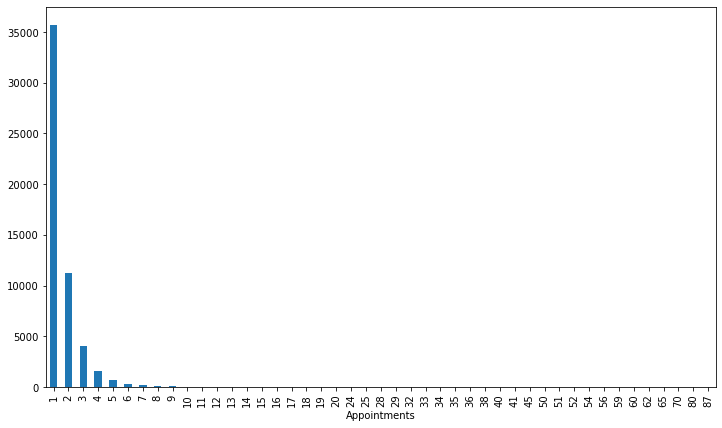

In [24]:
#more than 35000 patients showed up for one appointment

df_rp.groupby('Appointments').size().plot(kind='bar')
plt.show()

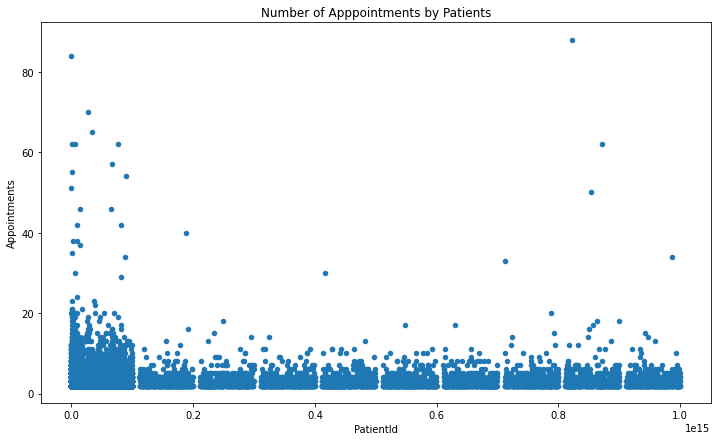

Unique patients who showed up more than once: 18444


In [25]:
#where patients had more one appointments

df_rp = df[df.PatientId.isin(v.index[v.gt(1)])] #
df_rp = df_rp.PatientId.value_counts().rename_axis('PatientId').reset_index(name='Appointments')
df_rp.plot.scatter(x='PatientId', y='Appointments')
plt.title('Number of Apppointments by Patients')
plt.show()

print('Unique patients who showed up more than once:', df_rp.shape[0])

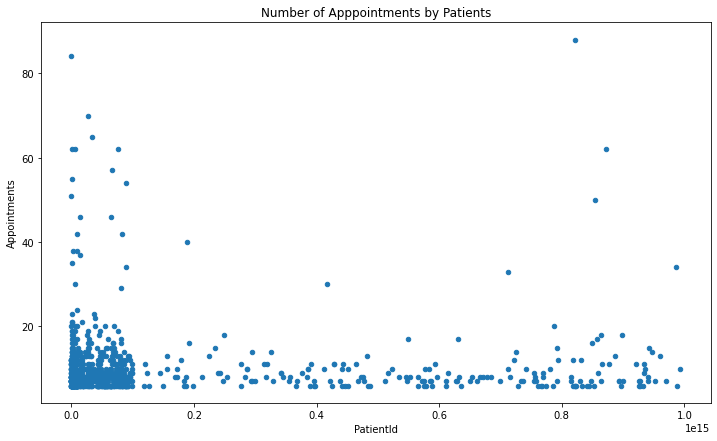

Unique patients who showed up more than once: 892


In [26]:
#where patients had more 5 appointments
df_rp = df[df.PatientId.isin(v.index[v.gt(5)])] #
df_rp = df_rp.PatientId.value_counts().rename_axis('PatientId').reset_index(name='Appointments')
df_rp.plot.scatter(x='PatientId', y='Appointments')
plt.title('Number of Apppointments by Patients')
plt.show()

print('Unique patients who showed up more than once:', df_rp.shape[0])

The piechart below shows that patients showed up whether or not they have any welfare package in place.

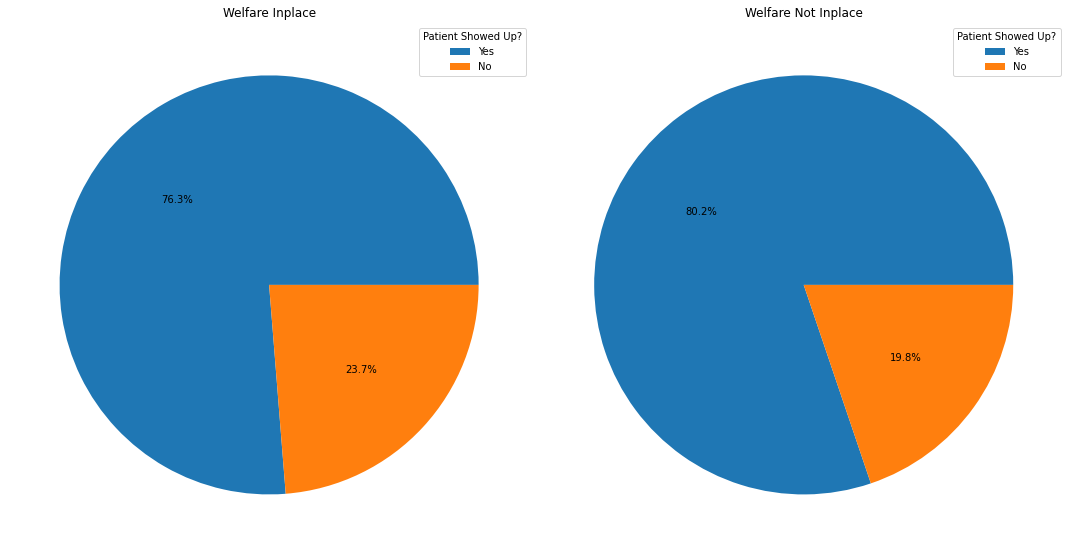

In [27]:
df_sch = df[df.Scholarship==1] #when patient has welfare package
df_nsc = df[df.Scholarship==0] #when patient has no welfare package

fig, ((ax0), (ax1 )) = plt.subplots(1,2 ,figsize=(15,10))

ax0.pie(df_sch.Showed_Up.value_counts(), autopct='%1.1f%%')
ax0.set_title('Welfare Inplace')
ax0.set_ylabel('')
ax0.legend(df_sch.Showed_Up.value_counts().index,title = 'Patient Showed Up?')


ax1.pie(df_nsc.Showed_Up.value_counts(), autopct='%1.1f%%')
ax1.set_title('Welfare Not Inplace')
ax1.set_ylabel('')
ax1.legend(df_nsc.Showed_Up.value_counts().index,title = 'Patient Showed Up?')


fig.tight_layout() #auto maintains space between subplots
plt.show()

Most of the appointments were in **May 2016**

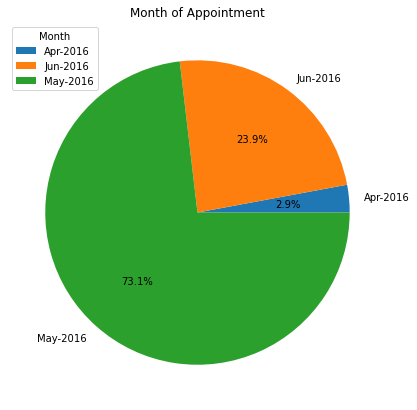

In [28]:
#query dataframe for when patients showed up
#df = df.query('Showed_Up =="Yes"')

df.groupby('AppoimtmentMonth').size().plot.pie(autopct='%1.1f%%')
plt.title('Month of Appointment')
plt.ylabel('')
plt.legend(title='Month')
plt.show()

### Conclusions

From the analysis above, i got the following insight:
- Patients showed up for their appointments **80%** of the time more than they didn't.
- The patients are predominatly female with average age of **39** while the male patients are young at **34**.
- Out of *62299* patients, **87%** (54154 patients) showed up for their various appointments.
- Patients who doesnt have any welfare pack at 80% showed up more than those who have at (73%).
- The month of May 2016 had the highest appoinments at 73% followed by June 2016 at 24%.